# Engineering Analytics and Machine Learning Lab 3
## for Specialist Diploma in Internet of Things

### Author’s Name: Teo Kok Keong

### Property of Temasek Polytechnic, Copyright ©.
### For circulation within Temasek Polytechnic only.



# 1 Data Cleaning



# 1.1  Missing Data

Missing Data in Pandas was handled in two ways, the None and NaN.


In [1]:
import numpy as np
import pandas as pd

#Let's look at None as a python object
x = np.array([1, None, 3, 2])
x           

array([1, None, 3, 2], dtype=object)

In [2]:
#NaN is recognized by all systems that use standard IEEE floating-point representation
y=np.array([1,np.nan,3,4])
print(y.dtype)

float64


In [3]:
#anything that have arithmetic operation with nan the result is nan

result=2+np.nan
print(result)
result2=np.nan/2
print(result2)

nan
nan


Pandas treat None and NaN essentially interchangeable for indicating missing or null values. To faciliate this convention, there are several useful methods to due with null values in Pandas data structure.

In [4]:
data=pd.Series([1,np.nan,'hello',None])
print(data)


0        1
1      NaN
2    hello
3     None
dtype: object


In [5]:
#we can detect null values using the isnull() method
print("isnull result")
print(data.isnull()) 

#we can do the opposite using the notnull() method
print("notnull  result")
print(data.notnull()) 


isnull result
0    False
1     True
2    False
3     True
dtype: bool
notnull  result
0     True
1    False
2     True
3    False
dtype: bool


## 1.2 Data Selection in Series

A Series object acts in many ways like a one-dimensional NumPy array, and in many ways like a standard Python dictionary. If we keep these two overlapping analogies in mind, it will help us to understand the patterns of data indexing and selection in these arrays

In [6]:
import pandas as pd
data = pd.Series([0.25, 0.5, 0.75, 1.0],index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [7]:
# we can select any value by

data['b']

0.5

In [8]:
#dictionary like expression 

print('a' in data)   #check key 'a' exist

print('w' in data)    #check key 'w' exist

print(data.keys())   

print(list(data.items()))

data['e']=1.25      #modify value to 1.25 with key='e'
print(data)      

True
False
Index(['a', 'b', 'c', 'd'], dtype='object')
[('a', 0.25), ('b', 0.5), ('c', 0.75), ('d', 1.0)]
a    0.25
b    0.50
c    0.75
d    1.00
e    1.25
dtype: float64


In [9]:
#also can be slice and select by Numpy array

print(data['a':'c'])  #select data from key='a' to 'c'
print(data[0:2])      #select data by implicit integer index
print(data[(data>0.3)&(data<0.8)] )  #by masking only select value between 0.3 and 0.8
print(data[['a','e']])   #select only value with key='a' and 'e'

a    0.25
b    0.50
c    0.75
dtype: float64
a    0.25
b    0.50
dtype: float64
b    0.50
c    0.75
dtype: float64
a    0.25
e    1.25
dtype: float64


In [10]:
#these selection can be use to mask out missing value
#lets redefine the data we have previously
data=pd.Series([1,np.nan,'hello',None])
print(data)

0        1
1      NaN
2    hello
3     None
dtype: object


In [11]:
print(data[data.notnull()])   #remove all the missing data

0        1
2    hello
dtype: object


In [12]:
#or there is convenience methods such as dropna() which mean removes NA value
print(data.dropna())


0        1
2    hello
dtype: object


Pandas DataFrame which is usually multidimensional is a little more complicated than Pandas Series. Simply because we cannot drop single values from a DataFrame, we can only drop full rows or full columns. However, that would affected a lot of other unrelated data points which essentially greatly reduce the number of data points. How to drop is very application dependent and there is no a simple all correct answer to all situations.

By default dropna() will drop all rows which any null value is present. We can dropna() of all column which any null is present by using the setting the axis='columns'

In [13]:
 df = pd.DataFrame([[1,      np.nan, 2],
                    [2,      3,      5],
                    [np.nan, 4,      6]])
print(df.dropna())     #drop all rolls with null value
print(df.dropna(axis='columns'))  #drop all columns with null value

    


     0    1  2
1  2.0  3.0  5
   2
0  2
1  5
2  6


In [14]:
#lets see how we can clean data with finerr grain of control
df[3] = np.nan   #add a third column that is all null values
print(df)
#The default of how='any', such that any row or column (depending on the axis keyword) containing a null value will be dropped. 
#we can set how='all' that mean only drop if cany row or column is all null value
print(df.dropna(axis='columns',how='all'))
#thresh let you specify what ist he minimum number of non-null values for the row/columns to be kept
print(df.dropna(axis='rows', thresh=3))   

     0    1  2   3
0  1.0  NaN  2 NaN
1  2.0  3.0  5 NaN
2  NaN  4.0  6 NaN
     0    1  2
0  1.0  NaN  2
1  2.0  3.0  5
2  NaN  4.0  6
     0    1  2   3
1  2.0  3.0  5 NaN


Sometime in certain application missing data can be replace by a certain number. In this section we are going to fill null values.

In [15]:
data1 = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'))
print(data1)
#we can fill all null with any value such as 0 in  this example
print(data1.fillna(0))
#forward-fill to propagate the previous value value forward, mean to fill null value with value of the previous non-null value
print(data1.fillna(method='ffill'))
#the opposite would be back fill
print(data1.fillna(method='bfill'))




a    1.0
b    NaN
c    2.0
d    NaN
e    3.0
dtype: float64
a    1.0
b    0.0
c    2.0
d    0.0
e    3.0
dtype: float64
a    1.0
b    1.0
c    2.0
d    2.0
e    3.0
dtype: float64
a    1.0
b    2.0
c    2.0
d    3.0
e    3.0
dtype: float64


In [16]:
#we can do similar thing with dataframe
print(df)
print(df.fillna(method='ffill',axis=1)) #in row
print(df.fillna(method='ffill',axis=0)) #in column
#if previous value not available nan would remain

     0    1  2   3
0  1.0  NaN  2 NaN
1  2.0  3.0  5 NaN
2  NaN  4.0  6 NaN
     0    1    2    3
0  1.0  1.0  2.0  2.0
1  2.0  3.0  5.0  5.0
2  NaN  4.0  6.0  6.0
     0    1  2   3
0  1.0  NaN  2 NaN
1  2.0  3.0  5 NaN
2  2.0  4.0  6 NaN


## Exercise 1

Load the data file april-2017.csv and use the head() and info() methods to understand more about the data. We want to drop the null values.

1. We cannot tolerate any null value, we  would remove any rows/columns with any null values. Rows or Column is feasible in this case?
2. Perform operation so that we can keep the rows/columns it does not contain all null values and forward fill the null value.


In [17]:
import numpy as np
import pandas as pd

ddf=pd.read_csv('april-2017.csv')
ddf.head()


,UTC time,3_temperature,3_humidity,3_pressure,3_pm1,3_pm25,3_pm10,140_temperature,140_humidity,140_pressure,...,857_pressure,857_pm1,857_pm25,857_pm10,895_temperature,895_humidity,895_pressure,895_pm1,895_pm25,895_pm10
0,2017-04-01T00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,6,92,101906,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-04-01T01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,6,92,101869,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-04-01T02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,5,94,101837,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-04-01T03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,5,92,101834,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-04-01T04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,4,94,101832,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
ddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Columns: 337 entries, UTC time to 895_pm10
dtypes: float64(193), int64(143), object(1)
memory usage: 1.9+ MB


In [19]:
ddf.dropna(axis='columns').head()

,UTC time,140_temperature,140_humidity,140_pressure,147_pressure,147_pm1,147_pm25,147_pm10,169_temperature,169_humidity,...,225_pressure,225_pm1,225_pm25,225_pm10,226_temperature,226_humidity,226_pressure,226_pm1,226_pm25,226_pm10
0,2017-04-01T00:00:00,6,92,101906,101829,69,65,94,6,89,...,101918,58,55,73,6,89,101904,32,31,53
1,2017-04-01T01:00:00,6,92,101869,101793,73,69,99,6,89,...,101879,56,53,70,5,89,101867,29,27,46
2,2017-04-01T02:00:00,5,94,101837,101760,76,72,103,5,91,...,101854,53,50,66,4,93,101833,24,21,35
3,2017-04-01T03:00:00,5,92,101834,101757,73,70,100,4,88,...,101847,51,47,64,4,89,101829,23,20,33
4,2017-04-01T04:00:00,4,94,101832,101755,74,71,101,4,91,...,101847,47,43,61,3,93,101827,26,23,37


## 1.3 Date Time 

Most Engineering data are time series, handling date time is one of the commonly data type. However date time come in all kind of format and many time when read from file it is read in as text/string. We would learn how to convert to proper python date time so that we could easily perform further processing.

Please refer to the below link for more on date time of Pandas:

[https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html)

## Exercise 2

Read in the lab3_date1.csv file into Pandas dataframe and preview the data.

Clean the data to remove all null value.

In [20]:
import numpy as np
import pandas as pd

dd=pd.read_csv('lab3_dateT.csv')
dd.head()
#the Datetime is read in as string/text we need to convert them to proper datetime format

,Datetime,this,Values
0,2017-04-01T00:00:00,NaN,1
1,2017-04-01T01:00:00,NaN,2
2,2017-04-01T02:00:00,NaN,3
3,2017-04-01T03:00:00,NaN,4
4,2017-04-01T04:00:00,NaN,5


In [21]:
dd=dd.dropna(axis='columns')
dd.head()

,Datetime,Values
0,2017-04-01T00:00:00,1
1,2017-04-01T01:00:00,2
2,2017-04-01T02:00:00,3
3,2017-04-01T03:00:00,4
4,2017-04-01T04:00:00,5


Lets proceed to convert the Datetime read in (still a string)  to proper Python date time.

In [22]:
dd['Datetime']=pd.to_datetime(dd['Datetime'],format='%Y-%m-%dT%H:%M:%S',utc=True) #convert string to datetime
#Note: the format string is provided as the date and time are seperated by 'T' rather than space
dd.head()


,Datetime,Values
0,2017-04-01 00:00:00+00:00,1
1,2017-04-01 01:00:00+00:00,2
2,2017-04-01 02:00:00+00:00,3
3,2017-04-01 03:00:00+00:00,4
4,2017-04-01 04:00:00+00:00,5


In [23]:
#convert the date time back to epoch notice that the epeoch is in us 1/1,000,000 second)
print(dd['Datetime'].astype(np.int64).head()) 

0    1491004800000000000
1    1491008400000000000
2    1491012000000000000
3    1491015600000000000
4    1491019200000000000
Name: Datetime, dtype: int64


In [24]:
dd.set_index('Datetime', inplace=True)  # set the date time as index
dd.head()



,Values
Datetime,
2017-04-01 00:00:00+00:00,1
2017-04-01 01:00:00+00:00,2
2017-04-01 02:00:00+00:00,3
2017-04-01 03:00:00+00:00,4
2017-04-01 04:00:00+00:00,5


In [25]:
#lets plot our first graph just for fun
import matplotlib.pyplot as plt
plt.plot(dd)
plt.show()

<Figure size 640x480 with 1 Axes>

In [26]:
#lets see how we convert from unix timestamp to python datetime then back to unix timestamp
from datetime import timezone
t=pd.to_datetime(1539259685,unit='s')   #Thursday, 11 October 2018 12:08:05
print(t)
print(t.timestamp())  #back to unix timestamp



2018-10-11 12:08:05
1539259685.0


## Exercise 3

Load remote_v3.csv and set the datetime to index (firstly convert to python datetime) then plot the scatter plot. Then select only data from 2017-08-11 09:00:00 to 2017-08-11 23:00:00 and plot the scatter plot


In [27]:
import numpy as np
import pandas as pd
from datetime import timezone
dd=pd.read_csv('remote_v3.csv')
dd.head()




,time,value
0,2017-08-11 00:00:00+08:00,0.0
1,2017-08-11 00:03:00+08:00,0.0
2,2017-08-11 00:06:00+08:00,0.0
3,2017-08-11 00:09:00+08:00,0.0
4,2017-08-11 00:12:00+08:00,0.0


In [28]:
dd['time']=pd.to_datetime(dd['time'],format='%Y-%m-%d %H:%M:%S+08:00',utc=True) #convert string to datetime
#tt=pd.to_datetime(dd['time'],format='%Y-%m-%d %H:%M:%S',utc=True) #convert string to datetime
#dd['time']=(dd['time'].astype(np.int64)) /100000000   #convert to second
dd.set_index('time', inplace=True)
dd.head()


,value
time,
2017-08-11 00:00:00+00:00,0.0
2017-08-11 00:03:00+00:00,0.0
2017-08-11 00:06:00+00:00,0.0
2017-08-11 00:09:00+00:00,0.0
2017-08-11 00:12:00+00:00,0.0


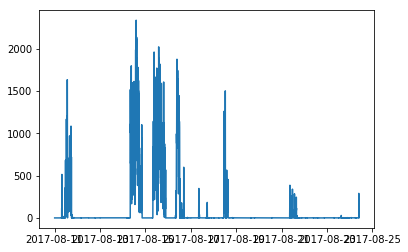

In [29]:
import matplotlib.pyplot as plt
plt.plot(dd)
plt.show()

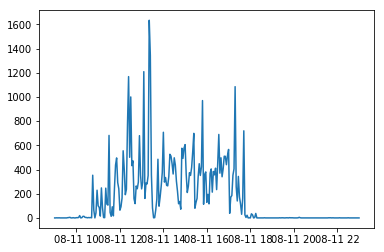

In [30]:
aa= dd['2017-08-11 09:00:00':'2017-08-11 23:00:00']
plt.plot(aa)
plt.show()